In [1]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import numpy as np

df = pd.read_csv("diffusion.csv", header = 0)
dataset = df.iloc[:,3:]
Y = dataset.iloc[:,0]
X = dataset.iloc[:,1:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_trs = []
y_trs = []

# Parameter: number of ensembled models
numB = 25;
for i in range(numB):
    X_train1, y_train1 = resample(X_train, y_train)
    X_trs.append(X_train1)
    y_trs.append(y_train1)

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(
		16,
		input_dim=X.shape[1],
		kernel_initializer='normal',
		activation='relu'))
	model.add(Dense(
		16,
		kernel_initializer='normal',
		activation='relu'))
	model.add(Dense(
		1,
		kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# train all numB models with bootstrap training sets
Bmodels = []  # list to store all numB models
histories = []
results = []
for i in range(numB):
    print('/////////////////   ITR ', i, '   ///////////////////')
    b_model = baseline_model()
    history = b_model.fit(X_trs[i], y_trs[i],
                         batch_size=5,
                         epochs=20)
    histories.append(history)
    print('\n history.history:', history.history)
    result = b_model.evaluate(X_test, y_test, batch_size = 64)
    results.append(result)
    print('\n test loss, acc:', result)
    Bmodels.append(b_model)

/////////////////   ITR  0    ///////////////////
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 285 samples
Epoch 1/20
285/285 [==============================] - 1s 2ms/sample - loss: 0.2294
Epoch 2/20
285/285 [==============================] - 0s 356us/sample - loss: 0.1544
Epoch 3/20
285/285 [==============================] - 0s 421us/sample - loss: 0.0806
Epoch 4/20
285/285 [==============================] - 0s 498us/sample - loss: 0.0497
Epoch 5/20
285/285 [==============================] - 0s 468us/sample - loss: 0.0405
Epoch 6/20
285/285 [==============================] - 0s 452us/sample - loss: 0.0349
Epoch 7/20
285/285 [==============================] - 0s 458us/sample - loss: 0.0314
Epoch 8/20
285/285 [==============================] - 0s 360us/sample - loss: 0.0284
Epoch 9/20
285/285 [==============================] 

285/285 [==============================] - 0s 318us/sample - loss: 0.0698
Epoch 5/20
285/285 [==============================] - 0s 363us/sample - loss: 0.0515
Epoch 6/20
285/285 [==============================] - 0s 418us/sample - loss: 0.0475
Epoch 7/20
285/285 [==============================] - 0s 372us/sample - loss: 0.0374
Epoch 8/20
285/285 [==============================] - 0s 402us/sample - loss: 0.0348
Epoch 9/20
285/285 [==============================] - 0s 458us/sample - loss: 0.0300
Epoch 10/20
285/285 [==============================] - 0s 396us/sample - loss: 0.0267s - loss: 0.02
Epoch 11/20
285/285 [==============================] - 0s 439us/sample - loss: 0.0241
Epoch 12/20
285/285 [==============================] - 0s 463us/sample - loss: 0.0207
Epoch 13/20
285/285 [==============================] - 0s 461us/sample - loss: 0.0191
Epoch 14/20
285/285 [==============================] - 0s 459us/sample - loss: 0.0191
Epoch 15/20
285/285 [==============================] - 0s

In [2]:
#print(y_test)



70     1.00520
218   -0.10139
258    0.11524
33     1.76010
42     0.33779
        ...   
60    -0.08491
79     0.00000
290   -0.05668
227   -0.41841
305    0.49451
Name: E_regression_shift, Length: 123, dtype: float64


In [3]:
Y_preds = []  # Arrays of predictions on test dataset from all bootstrap models
perr2 = []  # residuals (real y in test dataset minus prediction result)
perrA = []  # absoulute residuals
pstd = []   # standard deviations of predictions from all bootstrap models
pdist = []  # normalized residuals
for i in range(numB):
    yp = Bmodels[i].predict(X_test)
    Y_preds.append(yp)
    
for ix in range(len(X_test)):
    tempyps = []
    for i in range(numB):
        tempyps.append(Y_preds[i][ix])
    res = y_test.iloc[ix] - np.mean(tempyps)
    istd = np.std(tempyps)
    perr2.append(res)
    perrA.append(abs(res))
    pstd.append(istd)
    pdist.append(res/istd)

In [4]:

print("Mean of absolute residuals: %.2f  Mean of std: %.2f"%(np.mean(perrA), np.mean(pstd)))

Mean of absolute residuals: 0.13  Mean of std: 0.07


In [5]:
print(perrA)

[0.007282943916320894, 0.04943046303033828, 0.011602185478210458, 0.3701560426712036, 0.24752826734542843, 0.08184593620300296, 0.11540579511642457, 0.3259861415052414, 0.131470858335495, 0.012093607740402246, 0.2613126431369781, 0.17401114386558525, 0.03800281618118287, 0.06952872439384458, 0.07965856620788575, 0.06037281135559082, 0.016120543437004087, 0.1311832728600502, 0.15794592622439574, 0.018465159034728895, 0.10178224138259884, 0.16279044844627383, 0.12702615597724914, 0.3512153691482544, 0.03543386314868924, 0.09826846960067748, 0.012710643925666815, 0.09942442460060119, 0.023805475858449943, 0.024840759067535412, 0.03137881378173829, 0.07184035047531127, 0.02290477231144905, 0.07777095944821834, 0.10864738589048387, 0.02185493071556094, 0.0043633759117126525, 0.14273297065734858, 0.043641023869514475, 0.05723031211853025, 0.40899970929622653, 0.05367005849838258, 0.025826518533229828, 0.0028094765377044695, 0.1450372628211975, 0.7568010571765899, 0.022364881017208113, 0.5036

In [6]:
perrAll = []
for i in range(len(X_test)):
    for j in range(numB):
        perrAll.append(y_test.iloc[i] - Y_preds[j][i])
        
len(perrAll)

615

TODO: Divide each residual by the pstd

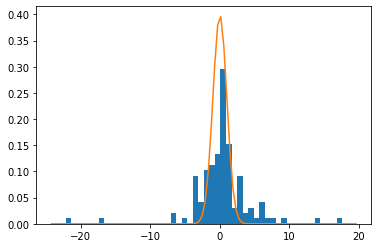

<Figure size 432x288 with 0 Axes>

In [7]:
import scipy.stats

plt.figure()
plt.hist(pdist, density=True, bins=50)
xmin, xmax = plt.xlim()
xn = np.linspace(xmin, xmax, 100)
mean = 0  # Normal distribution
std = 1  
yn = scipy.stats.norm.pdf(xn,mean,std)
plt.plot(xn, yn)

plt.ylabel = 'Error distribution vs Normal distribution'
plt.xlabel = 'residual/std at the point'
fignm = 'ErrNormVsNormBoot' + str(numB) + '.png'
plt.show()
plt.savefig(fignm)

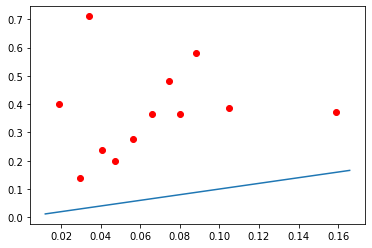

<Figure size 432x288 with 0 Axes>

In [8]:
# Sorting pstd and perrA as parallel lists
pstdS, perrAS = zip(*sorted(zip(pstd, perrA)))
# Generated congregated points
numG = 10  # need to factor of len(X_test), size of point groups
pstdG = []
perrRMSE = []
for i in range(int(len(X_test)/numG)):
    tmpStd = []
    tmpErrA = []
    for idx in range(i*numG, i*numG+numG):
        tmpStd.append(pstdS[idx])
        tmpErrA.append(perrAS[idx])
    pstdG.append(np.mean(tmpStd))
    perrRMSE.append(np.sqrt(np.sum(np.square(tmpErrA-np.mean(tmpErrA)))))

plt.figure()
plt.plot(pstdG, perrRMSE, 'ro')
xmin, xmax = plt.xlim()
xn = np.linspace(xmin, xmax, 100)
plt.plot(xn, xn)
plt.xlabel = 'std between models'
plt.ylabel = 'Abs residual'
plt.show()
plt.savefig('AbsResVStd'+str(numB)+'.png')